## complete Reliance Stock analysis, Simulation and prediction with trading using reinforcement learning
 #### Ved Prakash

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 7)

In [4]:
rel = pd.read_csv('E:/Important_project/alt_data_and_stock_prediction/stock_project1/RELIANCE.csv')
rel = rel[['Date','Open','High','Low','Close']]

rel.head()

,Date,Open,High,Low,Close
0,2017-08-28,782.111389,783.547729,773.270142,775.920044
1,2017-08-29,773.592102,776.390564,757.816650,758.881531
2,2017-08-30,766.509277,777.034485,763.388855,774.706543
3,2017-08-31,780.105408,791.224976,779.610046,789.763855
4,2017-09-01,792.413696,800.710083,791.992676,797.490601


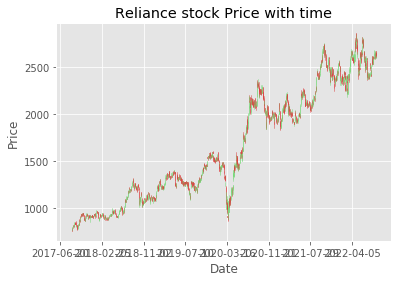

In [5]:
import matplotlib.ticker as mticker
from mplfinance.original_flavor import candlestick_ohlc
from datetime import date
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import yfinance as yf
import finplot as fplt

df_cp = rel.copy()
df_cp.Date = date2num(pd.to_datetime(rel.Date).dt.to_pydatetime())
ax1 = plt.subplot2grid((1,1), (0,0))
candlestick_ohlc(ax1,df_cp.values, width=0.4, colorup='#77d879', colordown='#db3f3f',alpha=2)
x_range = np.arange(df_cp.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Reliance stock Price with time')
plt.show()

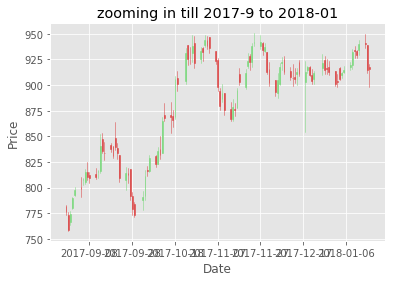

In [6]:
ax1 = plt.subplot2grid((1,1), (0,0))
ret=candlestick_ohlc(ax1,df_cp.iloc[:100,:].values, width=0.4, colorup='#77d879', colordown='#db3f3f',alpha=2)
x_range = np.arange(df_cp.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)
plt.title('zooming in till 2017-9 to 2018-01')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [7]:
rel["Date"]= pd.to_datetime(rel["Date"])

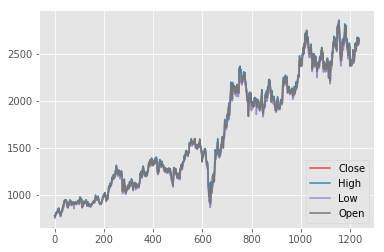

In [8]:
## ploting the close, high, low, open with time 
ax1 = plt.subplot2grid((1,1), (0,0))
ax1.plot(df_cp['Close'])
ax1.plot(df_cp['High'])
ax1.plot(df_cp['Low'])
ax1.plot(df_cp['Open'])

ax1.legend(loc ='lower right')

plt.show()

In [9]:
## log transformation of close price
rel['Closelog'] = np.log(rel.Close)
rel.head()

,Date,Open,High,Low,Close,Closelog
0,2017-08-28,782.111389,783.547729,773.270142,775.920044,6.654049
1,2017-08-29,773.592102,776.390564,757.816650,758.881531,6.631846
2,2017-08-30,766.509277,777.034485,763.388855,774.706543,6.652484
3,2017-08-31,780.105408,791.224976,779.610046,789.763855,6.671734
4,2017-09-01,792.413696,800.710083,791.992676,797.490601,6.681470


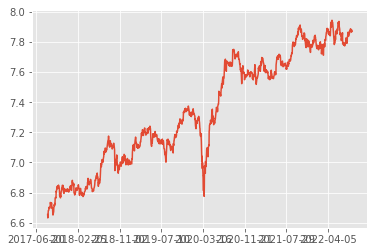

In [10]:
## ploting the closelog with time
ax1 = plt.subplot2grid((1,1), (0,0))

ax1.plot(rel['Date'],rel['Closelog'])

x_range = np.arange(df_cp.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
# ax1.title('Closelog with time')
plt.show()


## yearwise analysis

In [11]:
rel_2017=rel[rel['Date'].dt.year == 2017]
rel_2018=rel[rel['Date'].dt.year == 2018]
rel_2019=rel[rel['Date'].dt.year == 2019]
rel_2020=rel[rel['Date'].dt.year == 2020]
rel_2021=rel[rel['Date'].dt.year == 2021]

In [12]:
rel['year'] = pd.DatetimeIndex(rel['Date']).year
rel['months'] = pd.DatetimeIndex(rel['Date']).month

In [13]:
rel_month_wise_close = pd.pivot_table(rel, values = "Close", columns = "year", index='months')

In [14]:
## monthwise value of Close price for 5 year 
rel_month_wise_close

year,2017,2018,2019,2020,2021,2022
months,,,,,,
1,NaN,931.562897,1149.163606,1502.899679,1957.662494,2451.782544
2,NaN,913.715210,1238.051359,1427.307386,2011.252509,2367.997498
3,NaN,900.336757,1307.415337,1091.105027,2097.033349,2459.750000
4,NaN,926.411394,1349.067447,1259.761481,1961.278956,2672.586863
5,NaN,939.127552,1302.008256,1459.851575,1972.582513,2566.538086
6,NaN,975.305083,1291.750231,1632.231823,2188.272705,2624.811368
7,NaN,1059.353843,1245.956968,1939.930436,2091.300008,2430.821429
8,774.817993,1217.365345,1216.392322,2110.792899,2153.309512,2610.016683
9,814.197696,1229.146145,1225.439338,2214.381836,2425.345250,NaN


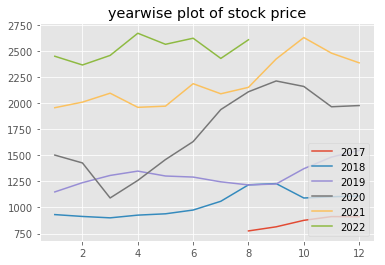

In [15]:
## yearwise plot of stock with months
ax2 = plt.subplot2grid((1,1), (0,0))
ax2.plot(rel_month_wise_close[2017])
ax2.plot(rel_month_wise_close[2018])
ax2.plot(rel_month_wise_close[2019])
ax2.plot(rel_month_wise_close[2020])
ax2.plot(rel_month_wise_close[2021])
ax2.plot(rel_month_wise_close[2022])
ax2.set_title('yearwise plot of stock price')
ax2.legend(loc ='lower right')
plt.show()

In [16]:

model_mean_pred = rel.Closelog.mean()
rel["Closemean"] = np.exp(model_mean_pred)

In [17]:
model_mean_pred

7.340583237373639

In [18]:
## trying to fit a linear curve on the model to get a idea of trend
from sklearn import linear_model
x = np.arange(rel.shape[0]).reshape((-1,1))
y = rel.Close.values.reshape((-1,1))
reg = linear_model.LinearRegression()
pred = reg.fit(x, y).predict(x)

In [19]:
rel['linear'] = pred

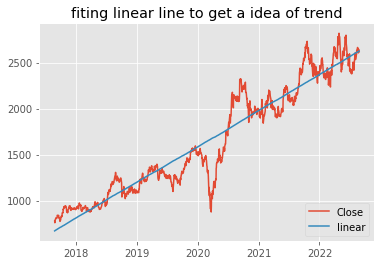

In [20]:

ax1 = plt.subplot2grid((1,1), (0,0))

ax1.plot(rel['Date'],rel['Close'])
ax1.plot(rel['Date'],rel['linear'])
ax1.legend(loc ='lower right')
ax1.set_title('fiting linear line to get a idea of trend')
plt.show()

In [21]:
reg.coef_

array([[1.58274497]])

In [22]:
## time series analysis by breaking decomposing the data

## Outlier detection

In [23]:
def df_shift(df,lag=0, start=1, skip=1, rejected_columns = []):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(start,lag+1,skip):
        for x in list(df.columns):
            if x not in rejected_columns:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = (skip - 1)
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=skip
        df = pd.concat([df, dfn], axis=1)
    return df

In [24]:
rel_cross = rel[['Date','Close']]

In [25]:
df_crosscorrelated = df_shift(rel_cross, lag = 10, start = 1, skip = 2,rejected_columns=['Date'])

### we use moving average to smoothen the curve and filter out the noise from the random short term flactuation. basically take the average of last 5, 10 or 15 days

In [26]:
## getting a idea of how the value is changing with respect to 1,3,5 and 7 days before 
df_crosscorrelated['ma7'] = df_crosscorrelated['Close'].rolling(7).mean()
df_crosscorrelated['ma14'] = df_crosscorrelated['Close'].rolling(14).mean()
df_crosscorrelated['ma25'] = df_crosscorrelated['Close'].rolling(25).mean()
df_crosscorrelated.head(30)


,Date,Close,Close_1,Close_3,Close_5,Close_7,Close_9,ma7,ma14,ma25
0,2017-08-28,775.920044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-29,758.881531,775.920044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-30,774.706543,758.881531,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-08-31,789.763855,774.706543,775.920044,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-09-01,797.490601,789.763855,758.881531,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-09-04,799.100342,797.490601,774.706543,775.920044,NaN,NaN,NaN,NaN,NaN
6,2017-09-05,808.634949,799.100342,789.763855,758.881531,NaN,NaN,786.356838,NaN,NaN
7,2017-09-06,814.974854,808.634949,797.490601,774.706543,775.920044,NaN,791.936096,NaN,NaN
8,2017-09-07,810.418030,814.974854,799.100342,789.763855,758.881531,NaN,799.298453,NaN,NaN
9,2017-09-08,809.229309,810.418030,808.634949,797.490601,774.706543,775.920044,804.230277,NaN,NaN


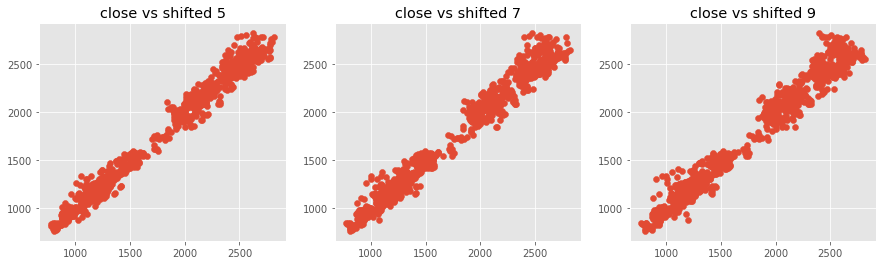

In [27]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_5'])
plt.title('close vs shifted 5')
plt.subplot(1,3,2)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_7'])
plt.title('close vs shifted 7')
plt.subplot(1,3,3)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_9'])
plt.title('close vs shifted 9')
plt.show()

#### we can see that close vs shifted graph are almost moving together indicating not much price change from last 5, 7 or 9 days

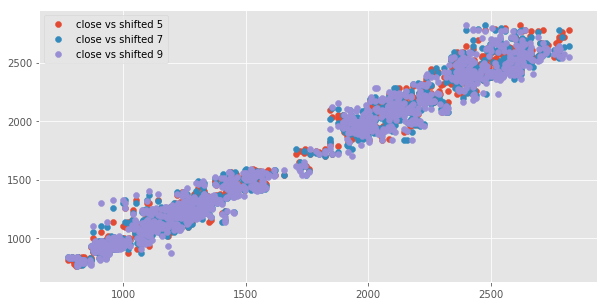

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_5'],label='close vs shifted 5')
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_7'],label='close vs shifted 7')
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_9'],label='close vs shifted 9')
plt.legend()
plt.show()

In [29]:
df_crosscorrelated["Date"]= pd.to_datetime(df_crosscorrelated["Date"])

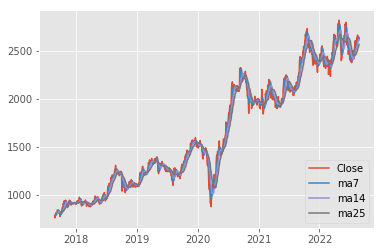

In [30]:
ax1 = plt.subplot2grid((1,1), (0,0))
ax1.plot(df_crosscorrelated["Date"],df_crosscorrelated['Close'])
ax1.plot(df_crosscorrelated["Date"],df_crosscorrelated['ma7'])
ax1.plot(df_crosscorrelated["Date"],df_crosscorrelated['ma14'])
ax1.plot(df_crosscorrelated["Date"],df_crosscorrelated['ma25'])

ax1.legend(loc ='lower right')
plt.show()

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

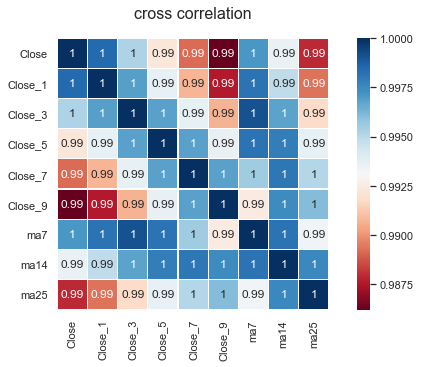

In [32]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10, 5))
ax=plt.subplot(111)
plt.title('cross correlation', y=1.05, size=16)
selected_column = ['Close','Close_1','Close_3','Close_5','Close_7','Close_9','ma7','ma14','ma25']

sns.heatmap(df_crosscorrelated[selected_column].corr(), ax=ax, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

### high correlation among the variable showing that price hasn't change much

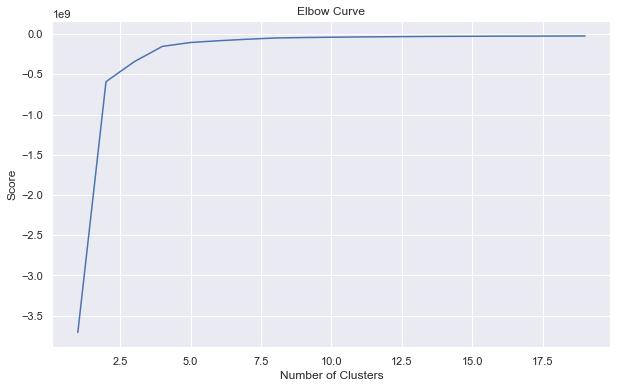

In [33]:
from sklearn.cluster import KMeans

n_cluster = range(1, 20)
data = df_crosscorrelated.iloc[:,1:].dropna().values
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [34]:
data[1]

array([790.853516  , 773.567383  , 791.645996  , 813.835632  ,
       833.449707  , 830.725525  , 795.87023929, 815.92300857,
       808.49428236])

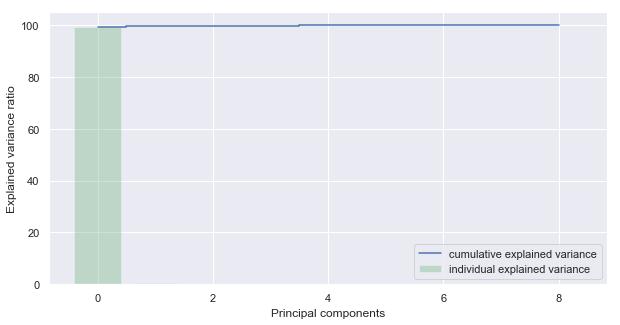

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df_crosscorrelated.iloc[:,1:].dropna().values
X_std = StandardScaler().fit_transform(X)

mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key = lambda x: x[0], reverse= True)

tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()


### we can see 2 principle component is enough to explain the maxium variation so we can take only 2 compoent and can drop rest 

In [36]:
X = df_crosscorrelated.iloc[:,1:].dropna().values
X_std = StandardScaler().fit_transform(X)
data = pd.DataFrame(X_std)
pca = PCA(n_components=2)
data = pca.fit_transform(data)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)

In [63]:
df = df_crosscorrelated.dropna()
kmeans = KMeans(n_clusters=3).fit(np_scaled)
df['cluster'] = kmeans.predict(np_scaled)
df = df.reset_index()
df['principal_feature1'] = np_scaled[:,0]
df['principal_feature2'] = np_scaled[:,1]
df['cluster'].value_counts()

1    620
0    322
2    271
Name: cluster, dtype: int64

### take the cutoff value for deciding the outlier based on local outlier factor

In [66]:
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = data[i]
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i]=np.linalg.norm(Xa-Xb)
    return distance

outliers_fraction = 0.1
distance = getDistanceByPoint(np_scaled, kmeans)
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
df['anomaly1'] = (distance >= threshold).astype(int)

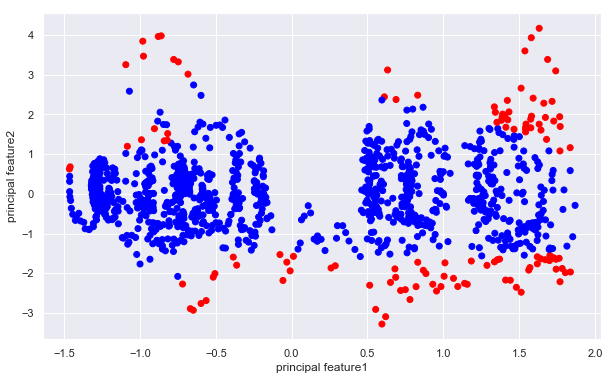

In [67]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show()

In [68]:
df.anomaly1.value_counts()

0    1092
1     121
Name: anomaly1, dtype: int64

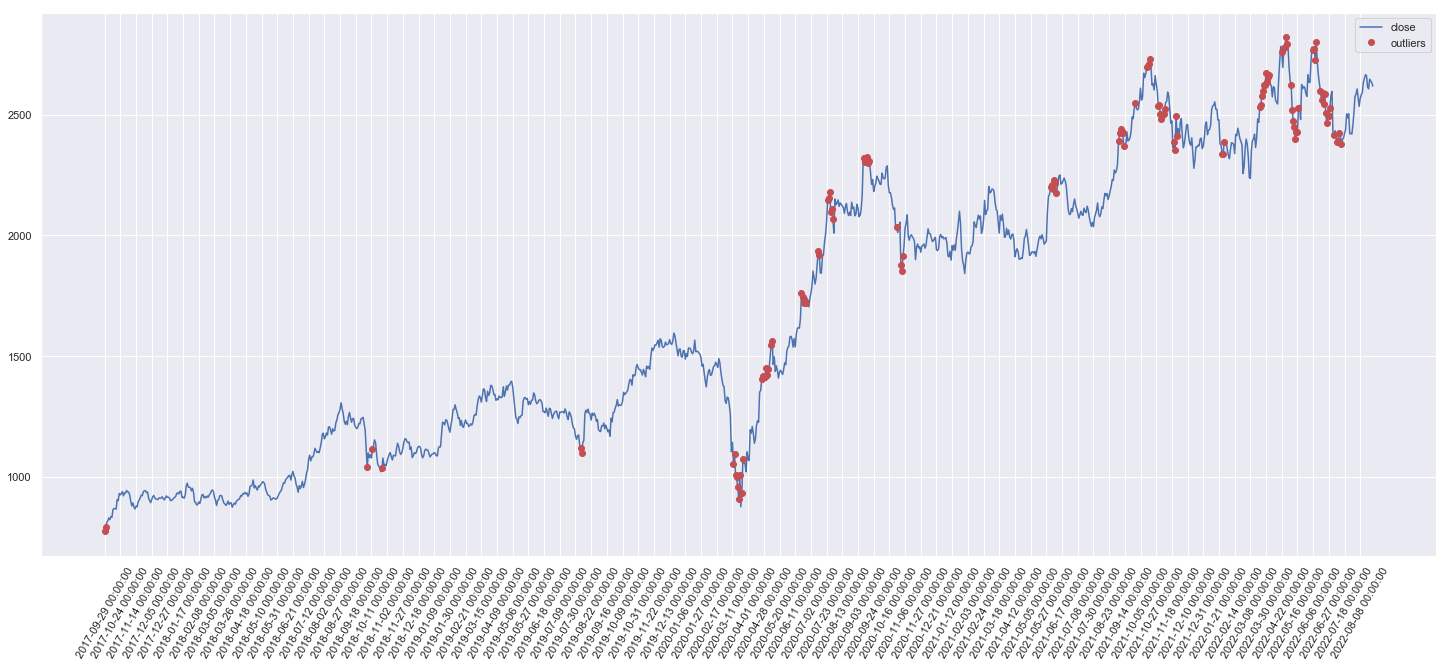

In [69]:
plt.figure(figsize=(25, 10))
plt.plot(df['Close'], label='close',c='b')
plt.plot(df['Close'], 'o', label='outliers',markevery=df.loc[df['anomaly1'] == 1].index.tolist(),c='r')
plt.xticks(np.arange(df.shape[0])[::15],pd.DatetimeIndex(df['Date'][::15]),rotation='60')
plt.legend()
plt.show()

C:\Users\india\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
C:\Users\india\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1395: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


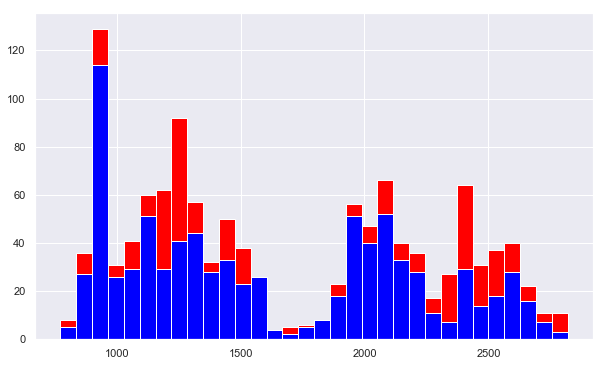

In [42]:
a = df.loc[df['anomaly1'] == 0, 'Close']
b = df.loc[df['anomaly1'] == 1, 'Close']

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show()

## monte-carlo-drift simulation

In [43]:
from tqdm import tqdm

In [44]:
number_simulation = 100
predict_day = 30

close = rel['Close'].tolist()
returns = pd.DataFrame(close).pct_change()
last_price = close[-1]
results = pd.DataFrame()
avg_daily_ret = returns.mean()
variance = returns.var()
daily_vol = returns.std()
daily_drift = avg_daily_ret - (variance / 2)
drift = daily_drift - 0.5 * daily_vol ** 2


In [45]:
for i in tqdm(range(number_simulation)):
    prices = []
    prices.append(df.Close.iloc[-1])
    for d in range(predict_day):
        shock = [drift + daily_vol * np.random.normal()]
        shock = np.mean(shock)
        price = prices[-1] * np.exp(shock)
        prices.append(price)
    results[i] = prices

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 78.61it/s]


In [46]:
results

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,...,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000
1,2577.610209,2679.005386,2666.078652,2607.127173,2626.539489,2724.469381,2646.534258,2647.846208,2641.428198,2636.295889,...,2577.551999,2547.228795,2631.239063,2670.113195,2667.822949,2607.695333,2589.026403,2621.300798,2602.295662,2715.965884
2,2618.580961,2675.712916,2683.064083,2616.273196,2541.085376,2847.572479,2557.922487,2717.731025,2589.466503,2683.694987,...,2653.935117,2430.437694,2580.903615,2819.289318,2616.995894,2562.677523,2508.106415,2570.704089,2673.833822,2705.618202
3,2622.753082,2695.907592,2605.706354,2637.612636,2491.567653,2806.737279,2524.140153,2649.792880,2625.361523,2626.522381,...,2664.142463,2426.179339,2641.426433,2785.132739,2629.050619,2557.700516,2544.919210,2656.135488,2582.921835,2705.911881
4,2669.036012,2759.472505,2606.937414,2575.949454,2477.699632,2784.544016,2589.008388,2677.717019,2674.097631,2640.468704,...,2642.477298,2399.297305,2636.987698,2740.696235,2656.124591,2571.199166,2471.071070,2676.040395,2582.334508,2703.690626
5,2676.256024,2795.902788,2684.763641,2622.118608,2483.815250,2712.747981,2645.377711,2696.654200,2636.379354,2655.633165,...,2665.444525,2381.768635,2683.946331,2728.901233,2606.438120,2494.645162,2435.907429,2651.238336,2575.924607,2665.291234
6,2750.725397,2759.965366,2656.580816,2625.373630,2452.800725,2745.949914,2632.419400,2692.402091,2629.537824,2617.668432,...,2633.592165,2340.186122,2695.393527,2686.146646,2546.188630,2510.623414,2337.693039,2671.179993,2570.179336,2674.329652
7,2807.741840,2762.501969,2713.718245,2581.890557,2431.207634,2698.441428,2545.855910,2703.557069,2666.256891,2641.612115,...,2607.641274,2454.025219,2798.150675,2788.464001,2518.172368,2511.227421,2357.254489,2677.592684,2592.512003,2657.105429
8,2850.219336,2745.465508,2716.522631,2627.910149,2464.697123,2686.592613,2660.272113,2660.842772,2599.205858,2625.050687,...,2591.991256,2450.365387,2834.026917,2874.311614,2541.945696,2483.839682,2367.298251,2634.918991,2653.190467,2604.778702
9,2889.510859,2801.410605,2792.476001,2568.944303,2539.356730,2701.612852,2676.080658,2647.409355,2533.749031,2640.977370,...,2622.294674,2472.362196,2900.226918,2820.646312,2575.996277,2576.378595,2370.346940,2682.668860,2685.718862,2622.227818


In [47]:
results['mean']= results[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]].mean(axis=1)

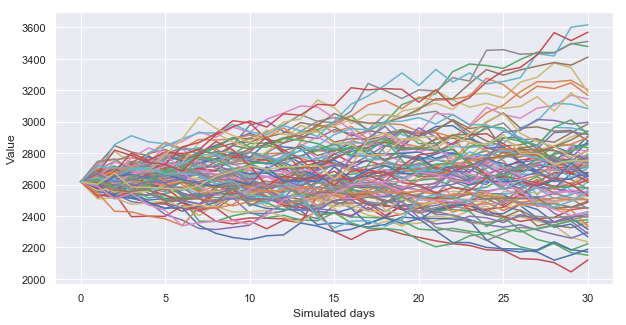

In [48]:
plt.figure(figsize=(10,5))
plt.plot(results.iloc[:,:-1])
# plt.plot(mean(results))
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.show()


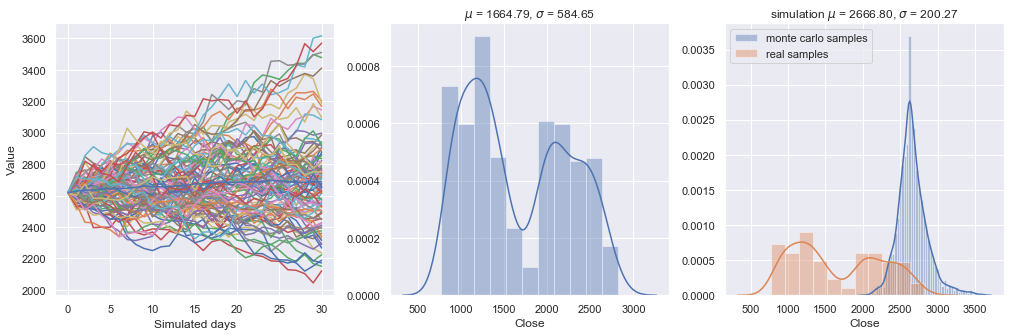

In [49]:
raveled = results.values.ravel()
raveled.sort()
cp_raveled = raveled.copy()

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.subplot(1,3,2)
sns.distplot(df.Close,norm_hist=True)
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(df.Close.mean(),df.Close.std()))
plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(df.Close,norm_hist=True,label='real samples')
plt.title('simulation $\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.legend()
plt.show()

### Using LSTM to predict the stock

In [50]:
## model building using LSTM
import tensorflow as tf
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential

In [51]:
train_open= rel.iloc[:, 1:2].values[:1100]
test_open=rel.iloc[:, 1:2].values[1100:]

In [52]:
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)

In [53]:
xtrain=[]
ytrain=[]
for i in range(60,len(train_open_scaled)):
    xtrain.append(train_open_scaled[i-60:i,0])
    ytrain.append(train_open_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [54]:
xtrain.shape

(1040, 60)

In [55]:
ytrain.shape

(1040,)

In [56]:
#initialisizng the model 
regression= Sequential()

#First Input layer and LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))

# Where:
#     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
regression.add(Dense(units=1))

#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')


#fitting the network
regression.fit(xtrain,ytrain,batch_size=30,epochs=100)

Epoch 1/100
35/35 [==============================] - 12s 89ms/step - loss: 0.0360
Epoch 2/100
35/35 [==============================] - 3s 80ms/step - loss: 0.0057
Epoch 3/100
35/35 [==============================] - 3s 80ms/step - loss: 0.0046
Epoch 4/100
35/35 [==============================] - 3s 84ms/step - loss: 0.0052
Epoch 5/100
35/35 [==============================] - 4s 105ms/step - loss: 0.0048
Epoch 6/100
35/35 [==============================] - 3s 87ms/step - loss: 0.0049
Epoch 7/100
35/35 [==============================] - 3s 86ms/step - loss: 0.0051
Epoch 8/100
35/35 [==============================] - 4s 102ms/step - loss: 0.0042
Epoch 9/100
35/35 [==============================] - 3s 92ms/step - loss: 0.0042
Epoch 10/100
35/35 [==============================] - 4s 108ms/step - loss: 0.0039
Epoch 11/100
35/35 [==============================] - 3s 96ms/step - loss: 0.0038
Epoch 12/100
35/35 [==============================] - 3s 83ms/step - loss: 0.0038
Epoch 13/100
35/35 [=

In [57]:
test_open_scaled= ss.fit_transform(test_open)

In [58]:
xtest=[]
ytest=[]
for i in range(60,len(test_open_scaled)):
    xtest.append(test_open_scaled[i-60:i,0])
    ytest.append(test_open_scaled[i,0])

xtest, ytest = np.array(xtest), np.array(ytest)

In [59]:
predicted_value=regression.predict(xtest)

3/3 [==============================] - 2s 72ms/step


In [60]:
real_predicted_value=ss.inverse_transform(predicted_value)

In [61]:
actual_value=test_open[60:]

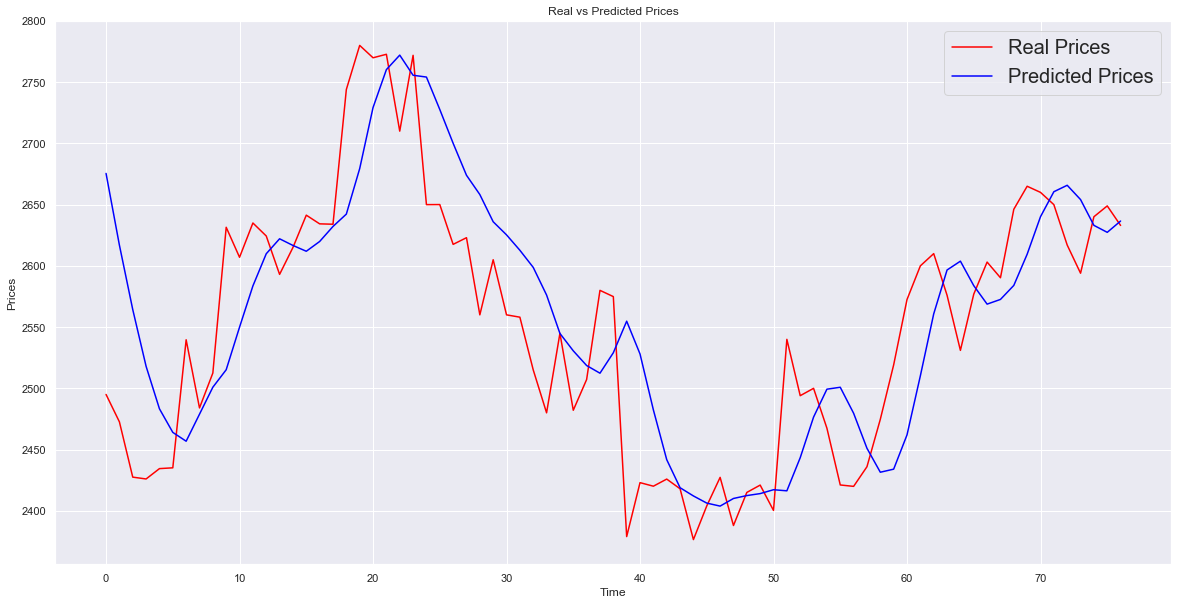

In [62]:
plt.figure(figsize=(20,10))
plt.plot(actual_value,'red',label='Real Prices')
plt.plot(real_predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)
plt.show()

 ## conclusion:
  <li> need more data for better prediction </li>
  <li> it catch some pattern </li>

### creating bot to trade using policy gradiant agent (reinforcement learning)